In [38]:
#import libraries

import pandas as pd
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
import re
nltk.download('stopwords')
import nltk
nltk.download('punkt')
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud 
from textblob import TextBlob

[nltk_data] Downloading package stopwords to C:\Users\Twinkle
[nltk_data]     Joshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Twinkle
[nltk_data]     Joshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [39]:
#reading data
reviews_data= pd.read_csv("C:/Users/Twinkle Joshi/reviews_data.csv", index_col=0)

In [40]:
reviews_data

,business_id,review_id,user_id,stars,text
0,6iYb2HFDywm3zjuRg0shjw,bkHUOCicGZ856vpvcWuW7Q,93z0yh-sUpGZS-cSKu6xxA,5.0,Stopped in on a busy Friday night. Despite the...
1,ufCxltuh56FF4-ZFZ6cVhg,lVUqo3YtQznyPQvtuFpPFQ,sTg4OBSuOoWMIl_1m4Qeyw,5.0,"I think if I found I had one day to live, I wo..."
2,GfWJ19Js7wX9rwaHQ7KbGw,3_YHtuPkAznWcBBA9V8wfw,ci7Q6NvXQ8UZrBHusVX18g,2.0,HECK NO!! Some of the world's lousiest food ex...
3,dmbbf3AqeG61_QHRZi1M1w,kbdSsU9STD1ai9w2uC2ifw,pxB64-9gMZIwbuf-r6abmg,5.0,Free WiFi. Extremely friendly staff. Clean and...
4,ynTjh_FdhbG5hY69HsEoaA,BLd43Fj-j49dOB4BMnKNOw,xqt3vBcfVp6LARxRsJcRog,4.0,Excellent food and great service. \n\nHad the ...
...,...,...,...,...,...
25318,r5Uag1JqYjr2nbxQCVqm8A,OB-j5FyMOQPXNAZIHKbfMQ,olFGbukXZFxGCHe9qnW9Sg,5.0,Amazing service! Had the B2 and my boyfriend h...
25319,Zl6SUy6x9jqjRu2HbtEO6A,nE2MmPMDTo_3deoBwUHs0w,jLfpOG4wGuCJlyfW4xBOoA,4.0,Is this really the same place that the prior r...
25320,Q78fYV6B6P6GmX07YVgi4g,Gja-y4ozV5cto8uGKetmYg,UufxijFyyxvavxZi2kjUbQ,2.0,Went with a female friend tonight. The place w...
25321,uXdQkuEtvLAzfc3MsO-sTQ,TmFbu915eyZOgoa1B_mozA,STtDO5CkHrA8yeFEcuqeAw,5.0,Best plantains I have had in ages !!! Cooked t...


In [12]:
#created bag of words
bag_of_words = reviews_data['text'].str.lower().str.cat(sep=' ')

In [13]:
bag_of_words = re.sub('[^A-Za-z]+', ' ', bag_of_words)
bag_of_words[0:1001]

'stopped in on a busy friday night despite the crowd the service was expedient and warm the beers here speak for themselves so we sampled some of their taproom only offerings and the galaxy smash was clean tropical and sessionable this being said the real star of this place is the pizza it s a hand tossed style crust that s the perfect mix of crispy and doughy we ordered the special pizza luau bacon pineapple and fresh jalape o and it was the perfect mix of fat sweetness and heat if you re looking for a comfortable spot to grab a beer and share some food with some friends on pearl this is the place i think if i found i had one day to live i would come here everything is incredible the german chocolate cake will change your life we ve had the apple blueberry cherry strawberry rhubarb pies and each are awesome my kids like the cupcakes and cookies and little treats we had the chocolate cream pie and the raspberry cream cheese pie last saturday and as expected they were fantastic staff is

In [14]:
# checked stop words
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

In [7]:
word_tokens = word_tokenize(bag_of_words)

In [15]:
#defining a function to get cleaned sentences 
clean_sentence = []
for words in word_tokens:
    if words not in stop_words:
        clean_sentence.append(words)

In [16]:
#Remove single lenth character
remove_single= [word for word in clean_sentence if len(word) > 3]

# Remove numbers
clean_data = [word for word in remove_single if not word.isnumeric()]

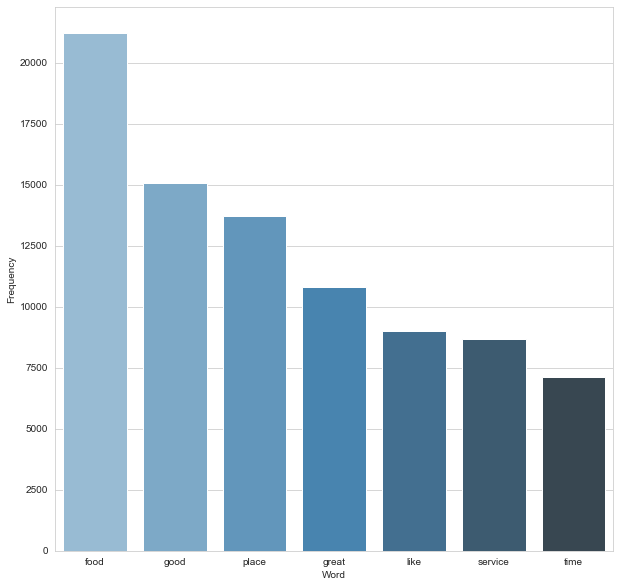

In [17]:
#visualizing the frequent words in reviews
top_N = 100
word_dist = nltk.FreqDist(clean_data)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7), palette="Blues_d")

In [18]:
#defining function to get wordcloud of frequent words
def wc(data,bgcolor,title):
    plt.figure(figsize = (80,80))
    wc = WordCloud(background_color = bgcolor, max_words = 200,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

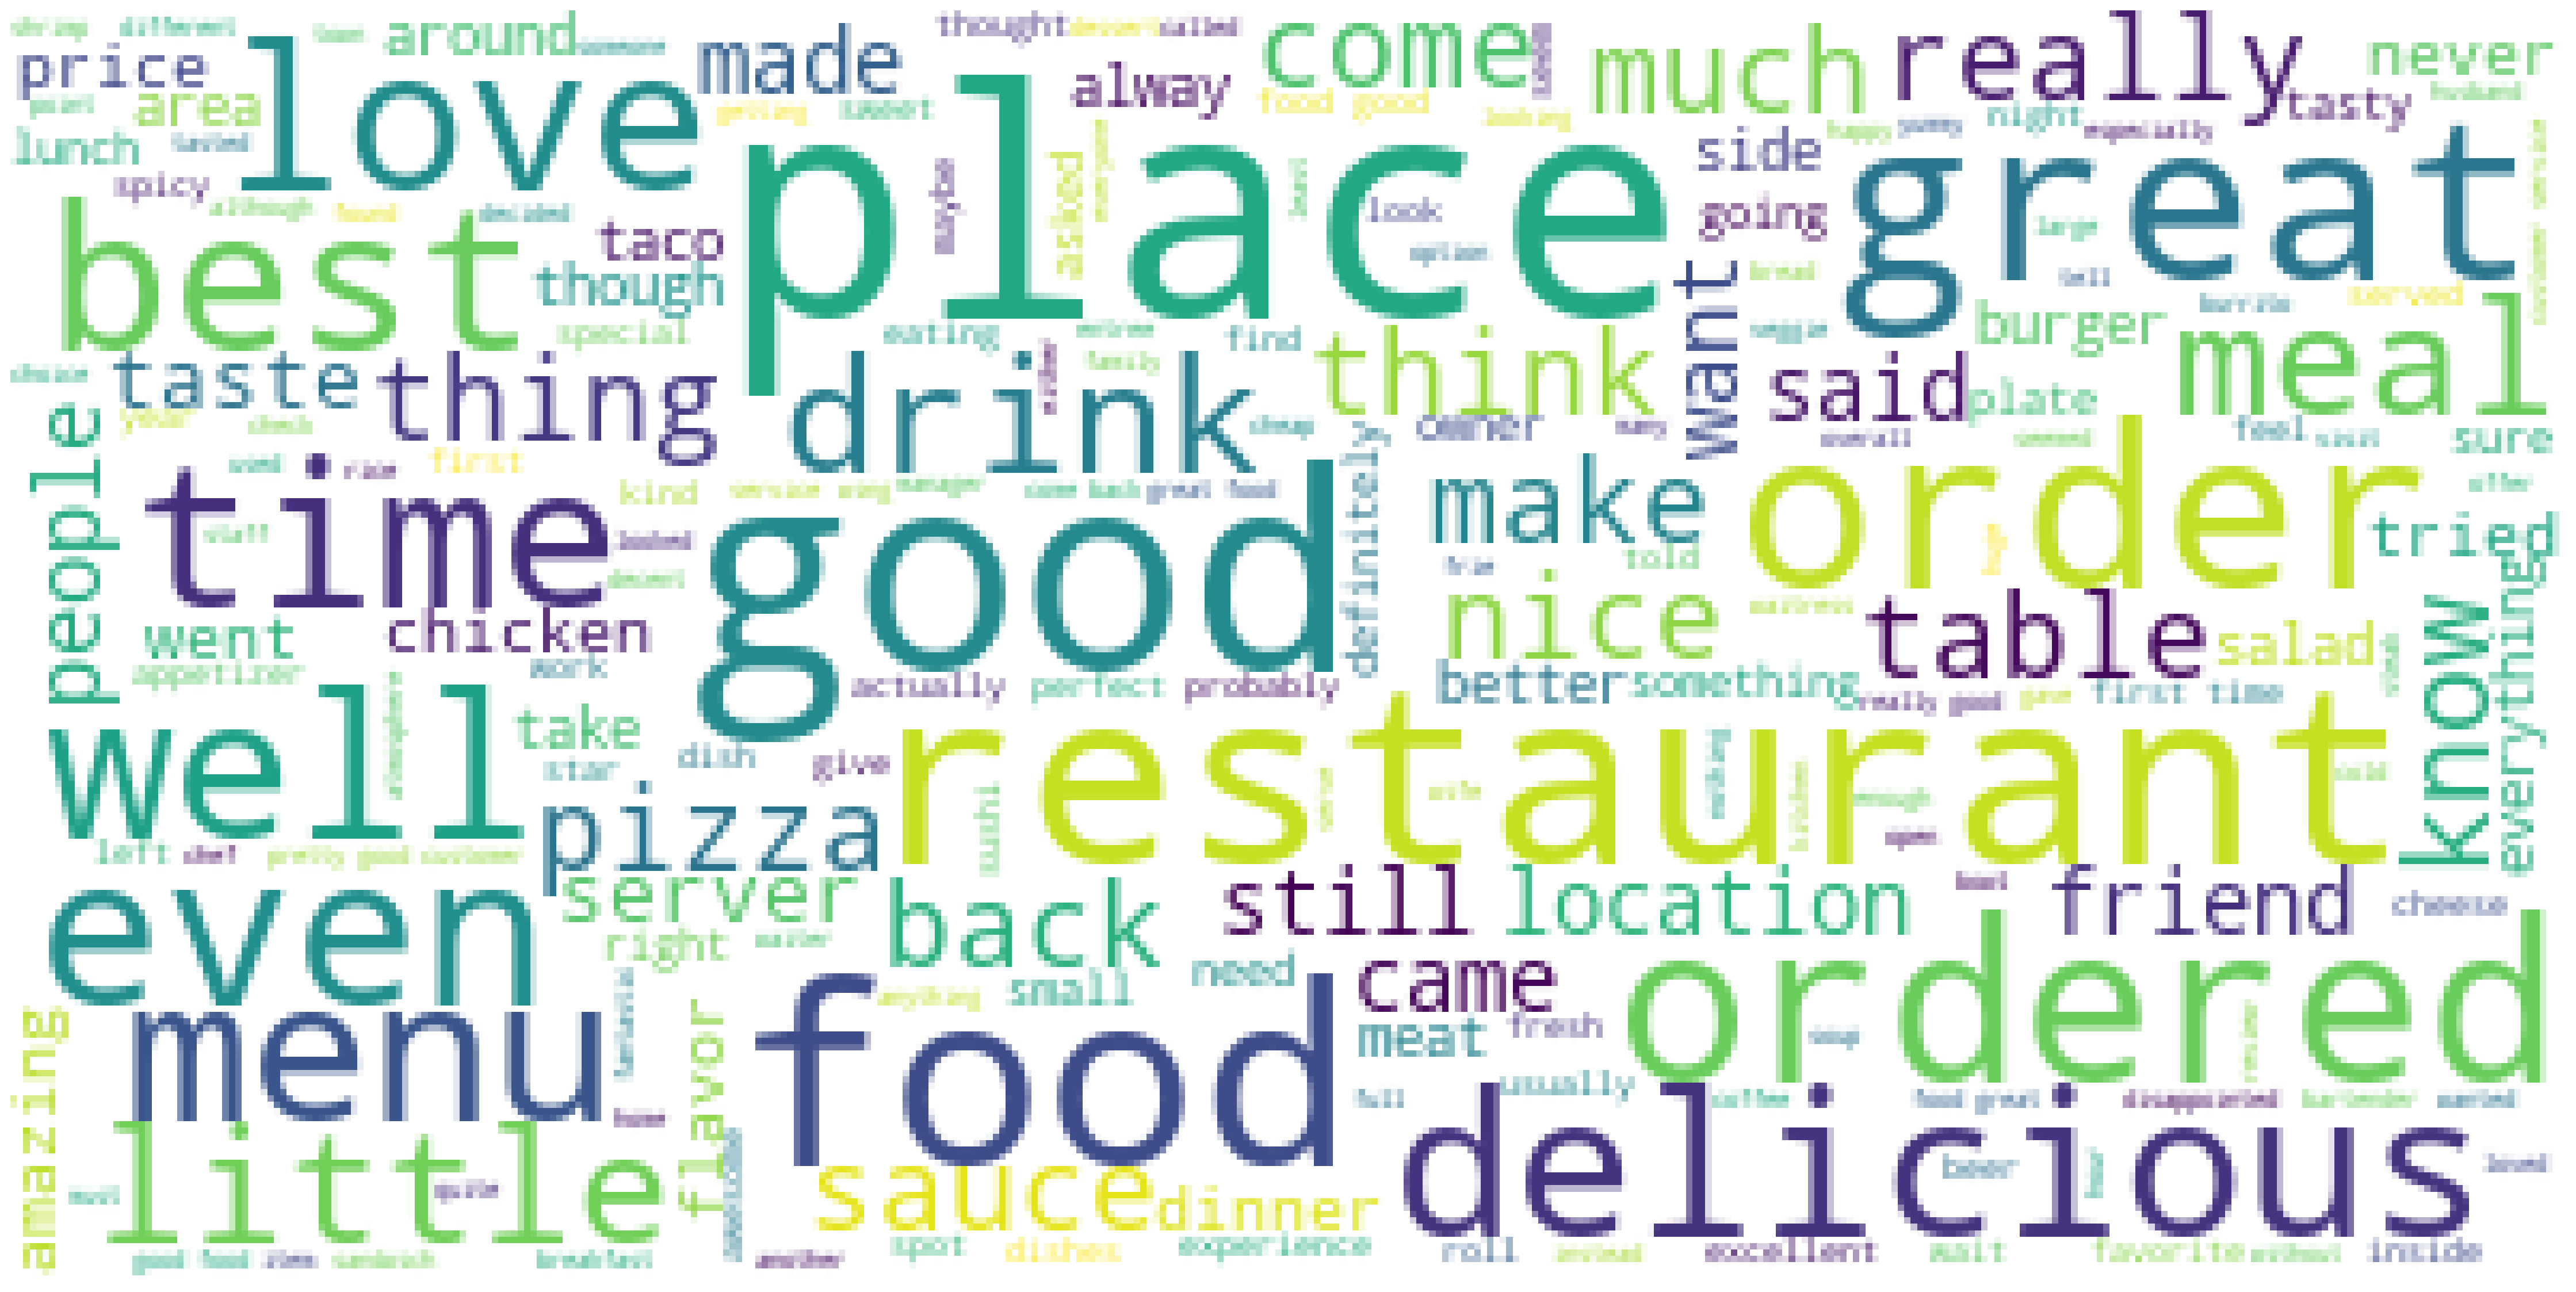

In [20]:
wc(clean_data,'white','Most frequent Words')

In [29]:
#Sentimental Analysis to find the positive, negative and neutral review
bloblist_desc = list()
reviews_data=reviews_data['text'].astype(str)

In [30]:
for row in reviews_data:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    polarity = pd.DataFrame(bloblist_desc, columns = ['Review','sentiment','polarity'])

In [31]:
polarity.head()

,Review,sentiment,polarity
0,Stopped in on a busy Friday night. Despite the...,0.442381,0.677143
1,"I think if I found I had one day to live, I wo...",0.268608,0.533333
2,HECK NO!! Some of the world's lousiest food ex...,0.005303,0.585931
3,Free WiFi. Extremely friendly staff. Clean and...,0.279167,0.633333
4,Excellent food and great service. \n\nHad the ...,0.408929,0.607143


In [32]:
def senti_analysis(polarity):
    if polarity['sentiment'] > 0:
        val = "Positive Review"
    elif polarity['sentiment'] == 0:
        val = "Neutral Review"
    else:
        val = "Negative Review"
    return val

In [34]:
polarity['Sentiment_Type'] =polarity.apply(senti_analysis,axis=1)

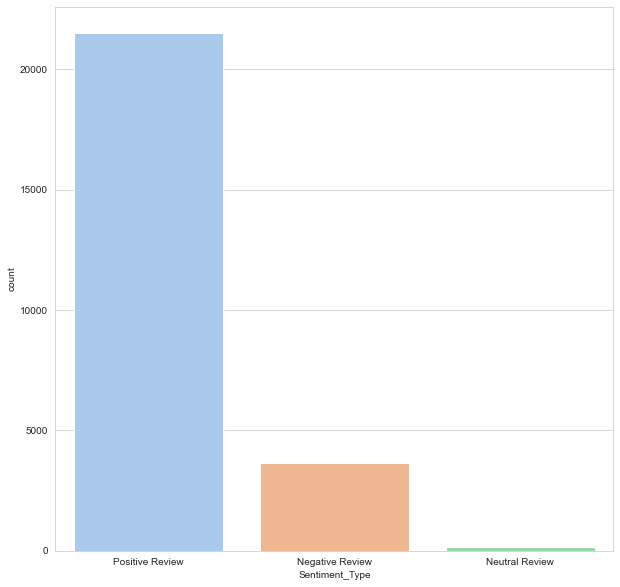

In [35]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=polarity, palette='pastel')